What are the most demanded skills for the top 3 most popular data roles?

In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df.job_posted_date)
df['job_skills'] = df.job_skills.apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

/opt/miniconda3/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."


In [4]:
# filter for Canada

df_CA = df[df.job_country == 'Canada'].copy()

In [8]:
df_skills = df_CA.explode('job_skills')

In [10]:
df_skills[['job_title_short','job_skills']]

,job_title_short,job_skills
50,Machine Learning Engineer,python
50,Machine Learning Engineer,sql
50,Machine Learning Engineer,pytorch
50,Machine Learning Engineer,pandas
59,Data Engineer,sql
...,...,...
785511,Data Engineer,spark
785511,Data Engineer,airflow
785511,Data Engineer,kafka
785643,Data Scientist,word


In [14]:
df_skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size().reset_index(name = 'skill_count')

df_skills_count

,job_skills,job_title_short,skill_count
0,airflow,Business Analyst,10
1,airflow,Cloud Engineer,17
2,airflow,Data Analyst,31
3,airflow,Data Engineer,1022
4,airflow,Data Scientist,84
...,...,...,...
1480,zoom,Data Scientist,8
1481,zoom,Senior Data Analyst,3
1482,zoom,Senior Data Engineer,5
1483,zoom,Senior Data Scientist,3


In [32]:
df_CA.job_title_short.value_counts()

job_titles = df_CA.job_title_short.value_counts().head(3).index.to_list()

job_titles

['Data Engineer', 'Data Analyst', 'Data Scientist']

In [33]:
job_titles = sorted(job_titles)
job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

In [34]:
import seaborn as sns

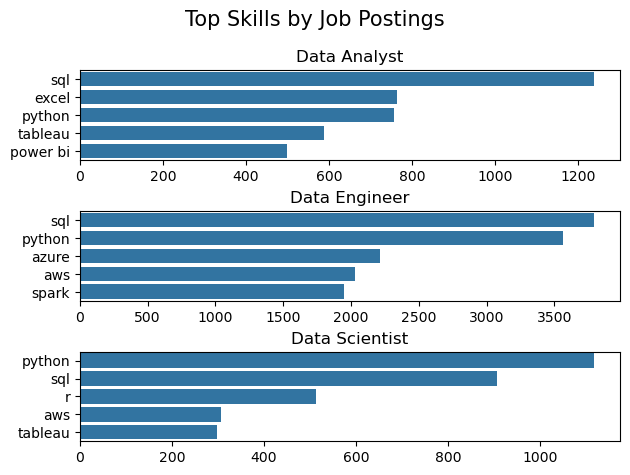

In [40]:
fig, ax = plt.subplots(len(job_titles), 1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count.job_title_short==job_title].sort_values(by = 'skill_count', ascending = False).head(5)
    sns.barplot(data = df_plot, x = 'skill_count', y = 'job_skills', ax= ax[i])
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')

fig.suptitle('Top Skills by Job Postings', fontsize = 15)
fig.tight_layout(h_pad = 0.5)

plt.show()


In [44]:
df_CA.job_title_short.value_counts()

df_jobs_total = df_CA[df_CA.job_title_short.isin(job_titles)].job_title_short.value_counts().reset_index(name = 'jobs_total').sort_index()


In [45]:
df_jobs_total

,job_title_short,jobs_total
0,Data Engineer,5828
1,Data Analyst,2365
2,Data Scientist,1825


In [48]:
df_skills_count = df_skills_count[df_skills_count.job_title_short.isin(job_titles)]

In [51]:
df_skills_count.merge(df_jobs_total, on = 'job_title_short', how = 'left')

df_merge = df_skills_count.merge(df_jobs_total, on = 'job_title_short', how = 'left')

df_merge

,job_skills,job_title_short,skill_count,jobs_total
0,airflow,Data Analyst,31,2365
1,airflow,Data Engineer,1022,5828
2,airflow,Data Scientist,84,1825
3,airtable,Data Analyst,3,2365
4,airtable,Data Scientist,1,1825
...,...,...,...,...
501,yarn,Data Engineer,63,5828
502,yarn,Data Scientist,3,1825
503,zoom,Data Analyst,13,2365
504,zoom,Data Engineer,29,5828


In [52]:
df_merge['job_prob'] = round(df_merge.skill_count * 100/df_merge.jobs_total,2)

In [53]:
df_merge

,job_skills,job_title_short,skill_count,jobs_total,job_prob
0,airflow,Data Analyst,31,2365,1.31
1,airflow,Data Engineer,1022,5828,17.54
2,airflow,Data Scientist,84,1825,4.60
3,airtable,Data Analyst,3,2365,0.13
4,airtable,Data Scientist,1,1825,0.05
...,...,...,...,...,...
501,yarn,Data Engineer,63,5828,1.08
502,yarn,Data Scientist,3,1825,0.16
503,zoom,Data Analyst,13,2365,0.55
504,zoom,Data Engineer,29,5828,0.50


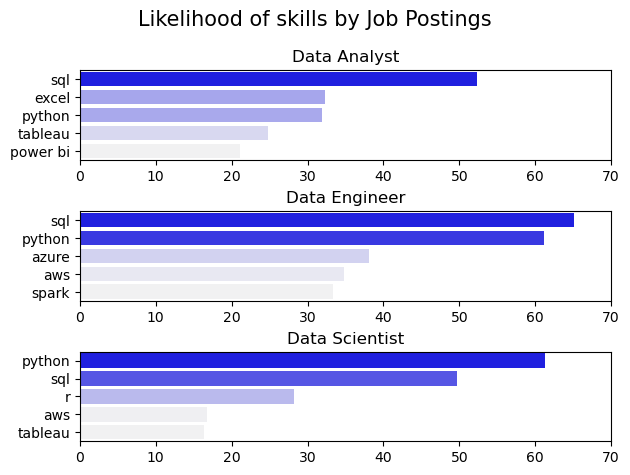

In [61]:
fig, ax = plt.subplots(len(job_titles), 1)

for i, job_title in enumerate(job_titles):
    df_plot = df_merge[df_merge.job_title_short==job_title].sort_values(by = 'job_prob', ascending = False).head(5)
    sns.barplot(data = df_plot, x = 'job_prob', y = 'job_skills', ax= ax[i], hue = 'job_prob', palette='light:b')
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].set_xlim(0,70)
    ax[i].legend().set_visible(False)

fig.suptitle('Likelihood of skills by Job Postings', fontsize = 15)
fig.tight_layout(h_pad = 0.5)

plt.show()

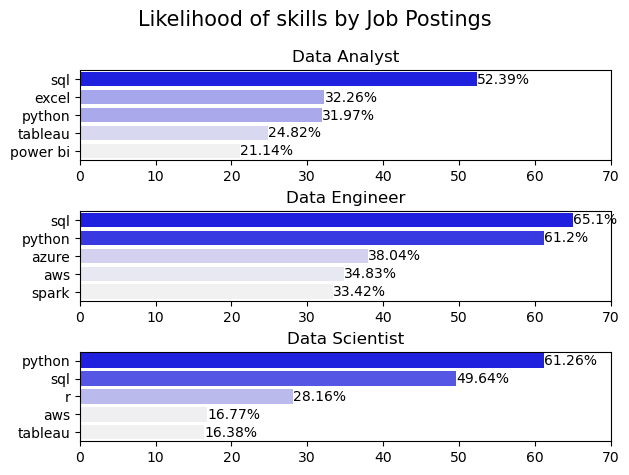

In [ ]:
fig, ax = plt.subplots(len(job_titles), 1)

for i, job_title in enumerate(job_titles):
    df_plot = df_merge[df_merge.job_title_short==job_title].sort_values(by = 'job_prob', ascending = False).head(5)
    sns.barplot(data = df_plot, x = 'job_prob', y = 'job_skills', ax= ax[i], hue = 'job_prob', palette='light:b')
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].set_xlim(0,70)
    ax[i].legend().set_visible(False)

    for num, val in enumerate(df_plot.job_prob):
        # plt.text
        ax[i].text(val, num, f'{val}%', va = 'center')

fig.suptitle('Likelihood of skills by Job Postings', fontsize = 15)
fig.tight_layout(h_pad = 0.5)

plt.show()

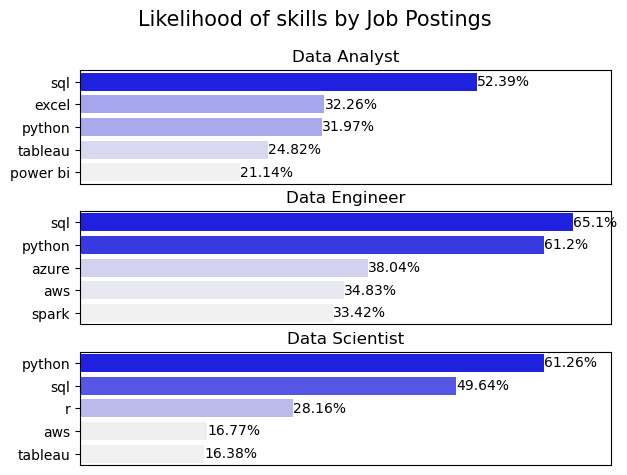

In [ ]:
fig, ax = plt.subplots(len(job_titles), 1)

for i, job_title in enumerate(job_titles):
    df_plot = df_merge[df_merge.job_title_short==job_title].sort_values(by = 'job_prob', ascending = False).head(5)
    sns.barplot(data = df_plot, x = 'job_prob', y = 'job_skills', ax= ax[i], hue = 'job_prob', palette='light:b')
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].set_xlim(0,70)
    ax[i].legend().set_visible(False)

    for num, val in enumerate(df_plot.job_prob):
        # plt.text
        ax[i].text(val, num, f'{val}%', va = 'center')

    ax[i].set_xticks([])

fig.suptitle('Likelihood of skills by Job Postings', fontsize = 15)
fig.tight_layout(h_pad = 0.5)

plt.show()

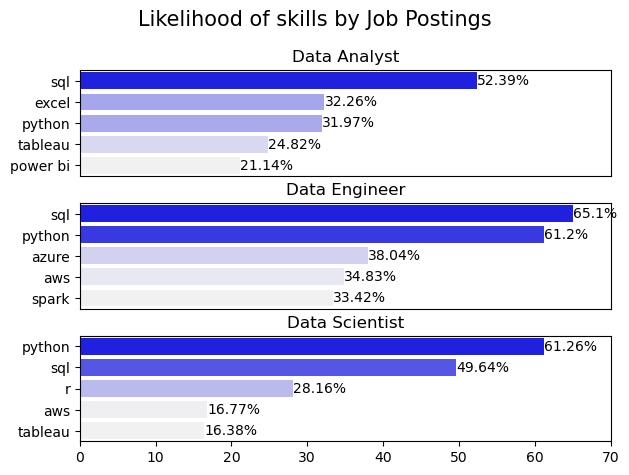

In [70]:
fig, ax = plt.subplots(len(job_titles), 1)

for i, job_title in enumerate(job_titles):
    df_plot = df_merge[df_merge.job_title_short==job_title].sort_values(by = 'job_prob', ascending = False).head(5)
    sns.barplot(data = df_plot, x = 'job_prob', y = 'job_skills', ax= ax[i], hue = 'job_prob', palette='light:b')
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].set_xlim(0,70)
    ax[i].legend().set_visible(False)

    for num, val in enumerate(df_plot.job_prob):
        # plt.text
        ax[i].text(val, num, f'{val}%', va = 'center')

    if i < len(job_titles)-1:
        ax[i].set_xticks([])

fig.suptitle('Likelihood of skills by Job Postings', fontsize = 15)
fig.tight_layout(h_pad = 0.5)

plt.show()